# Isolating Continuum Fitting Regions

In [16]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [31]:
hdu = fits.open('Programs:Coding/spec-0266-51630-0053.fits')
spec = hdu[1]
z = hdu[2].data['Z']

Text(0.5,0,'lam')

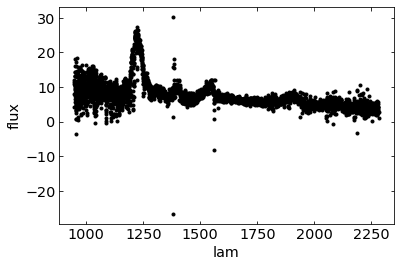

In [49]:
plt.plot(10**data.data['loglam'] / (1+z), data.data['flux'], 'k.')

plt.ylabel('flux')
plt.xlabel('lam')

Text(0.5,0,'lam')

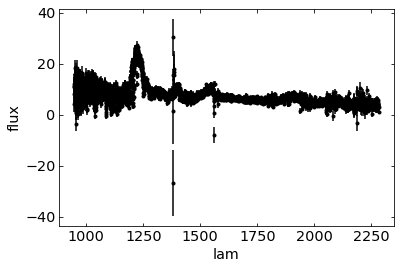

In [50]:
plt.errorbar(10**data.data['loglam'] / (1+z), data.data['flux'], yerr=np.sqrt(abs(1/data.data['ivar'])), color='k', fmt='.')
plt.ylabel('flux')
plt.xlabel('lam')

Text(0.5,0,'lam')

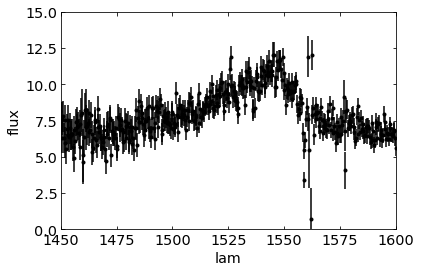

In [51]:
plt.errorbar(10**data.data['loglam'] / (1+z), data.data['flux'], yerr=np.sqrt(abs(1/data.data['ivar'])), color='k', fmt='.')
plt.xlim(1450, 1600)
plt.ylim(0, 15)
plt.ylabel('flux')
plt.xlabel('lam')

Text(0.5,0,'lam')

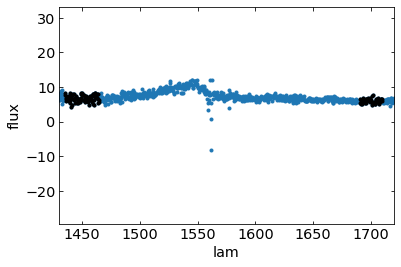

In [59]:
lam = 10**data.data['loglam'] / (1+z)
flux = data.data['flux']

ix1 = (lam > 1435)&(lam < 1465)
ix2 = (lam > 1690)&(lam < 1710)
plt.plot(lam, flux, 'C0.')
plt.plot(lam[ix1], flux[ix1], 'k.')
plt.plot(lam[ix2], flux[ix2], 'k.')

plt.xlim(1430, 1720)
plt.ylabel('flux')
plt.xlabel('lam')

In [69]:
fitting_flux = np.concatenate([flux[ix1], flux[ix2]])
fitting_lam = np.concatenate([lam[ix1], lam[ix2]])
fitting_ivar = np.concatenate([data.data['ivar'][ix1], data.data['ivar'][ix2]])

p = np.poly1d(np.polyfit(fitting_lam, fitting_flux, deg=1, w=fitting_ivar))

Text(0.5,0,'lam')

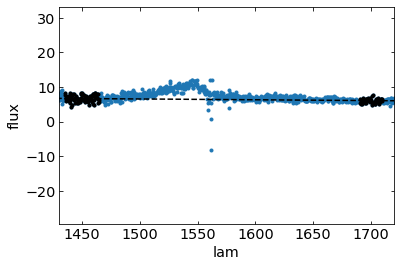

In [70]:
lam = 10**data.data['loglam'] / (1+z)
flux = data.data['flux']

ix1 = (lam > 1435)&(lam < 1465)
ix2 = (lam > 1690)&(lam < 1710)
plt.plot(lam, flux, 'C0.')
plt.plot(lam[ix1], flux[ix1], 'k.')
plt.plot(lam[ix2], flux[ix2], 'k.')

x = np.linspace(1400, 1800, 100)
plt.plot(x, p(x), 'k--')
plt.xlim(1430, 1720)
plt.ylabel('flux')
plt.xlabel('lam')